# Part II - Ford Go Bike Explanatory Report of Users in San Francisco for the month of February, of the year 2019. 
## by Julius Izanna


## Investigation Overview

In this investigation, I wanted to explore how certain features of the ford go bike trip dataset affect the duration of use. My main focus was on the age, gender, and type of users.


## Dataset Overview

This dataset consisted of trip datas of the ford go bike for 183412 individual rides. The dataset has 16 different columns that contains various information such as gender, year of birth of users of each individual ride. Additional columns such as duration in hours, age was created to simplify the analysis process.

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
# load in the dataset into a pandas dataframe
ford_bike = pd.read_csv('fordgobike_tripdata.csv')

In [14]:
# convert erroneous datatypes to the correct datatypes
ford_bike['start_time'] = pd.to_datetime(ford_bike['start_time'])
ford_bike['end_time'] = pd.to_datetime(ford_bike['end_time'])
ford_bike['member_gender'] = ford_bike['member_gender'].astype('category')


In [15]:
# extract the days of the week from the start_time and end_time
ford_bike['start_day'] = ford_bike['start_time'].apply(lambda x: x.day_name())
ford_bike['end_day'] = ford_bike['end_time'].apply(lambda x: x.day_name())

ford_bike['start_hour'] = ford_bike['start_time'].apply(lambda x: x.hour);
ford_bike['end_hour'] = ford_bike['end_time'].apply(lambda x: x.hour);

# compute and extract the duration in hours and minutes
ford_bike['duration_hour'] = ford_bike['duration_sec'].apply(lambda x: x/3600)
ford_bike['duration_minutes'] = ford_bike['duration_sec'].apply(lambda x: x/60)

# convert week days to categorical datatype
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

days = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)
ford_bike['start_day'] = ford_bike['start_day'].astype(days) 
ford_bike['end_day'] = ford_bike['end_day'].astype(days) 

In [18]:
# calculate the age of users and store in a column call age
ford_bike['age'] = pd.DatetimeIndex(ford_bike['end_time']).year - ford_bike['member_birth_year']

ford_bike['age'] = ford_bike['age'].fillna(0) # replace NaN values with 0
ford_bike['age'] = ford_bike['age'].astype('int64') # convert to integer datatype

## Number of Trips taken during the Week

> The most trip was taken on Thursday while Saturday and Sunday has fewer rides, which makes sense because most people are generally tired from communting during the weekdays to their respective place of work, rec center or other places of interest and so choose to rest on weekends.


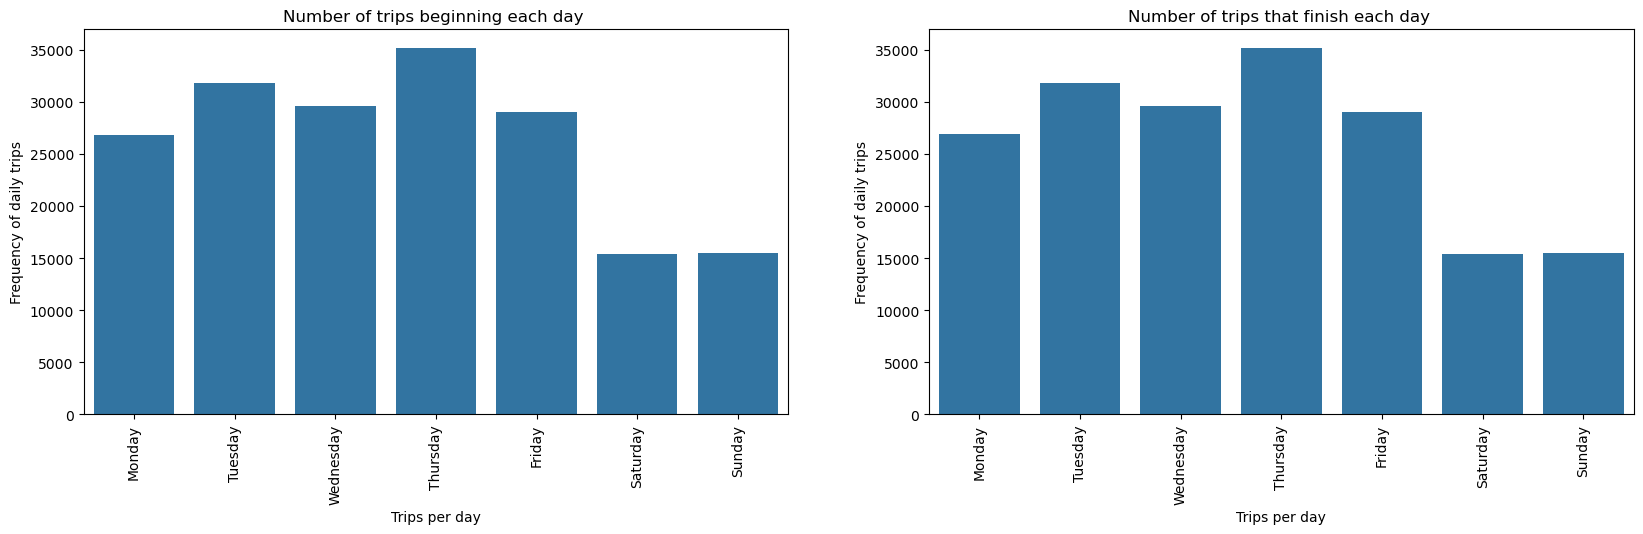

In [19]:
ford_color = sns.color_palette()[0]

plt.figure(figsize = [20,5])

plt.subplot(1, 2, 1)
sns.countplot(data = ford_bike, x = 'start_day', color = ford_color);
plt.xticks(rotation = 90);
plt.title('Number of trips beginning each day ');
plt.xlabel('Trips per day');
plt.ylabel('Frequency of daily trips');

plt.subplot(1, 2, 2)
sns.countplot(data = ford_bike, x = 'end_day', color = ford_color);
plt.xticks(rotation = 90);
plt.title('Number of trips that finish each day ');
plt.xlabel('Trips per day');
plt.ylabel('Frequency of daily trips');

## Distribution of Number of Trips for different Age group of different gender 

> From observation of the histogram plot, we can deduce that there are more male users of the ford bike than female users. The most active users of the ford bike for both sexes are with the age of 30 and 40.

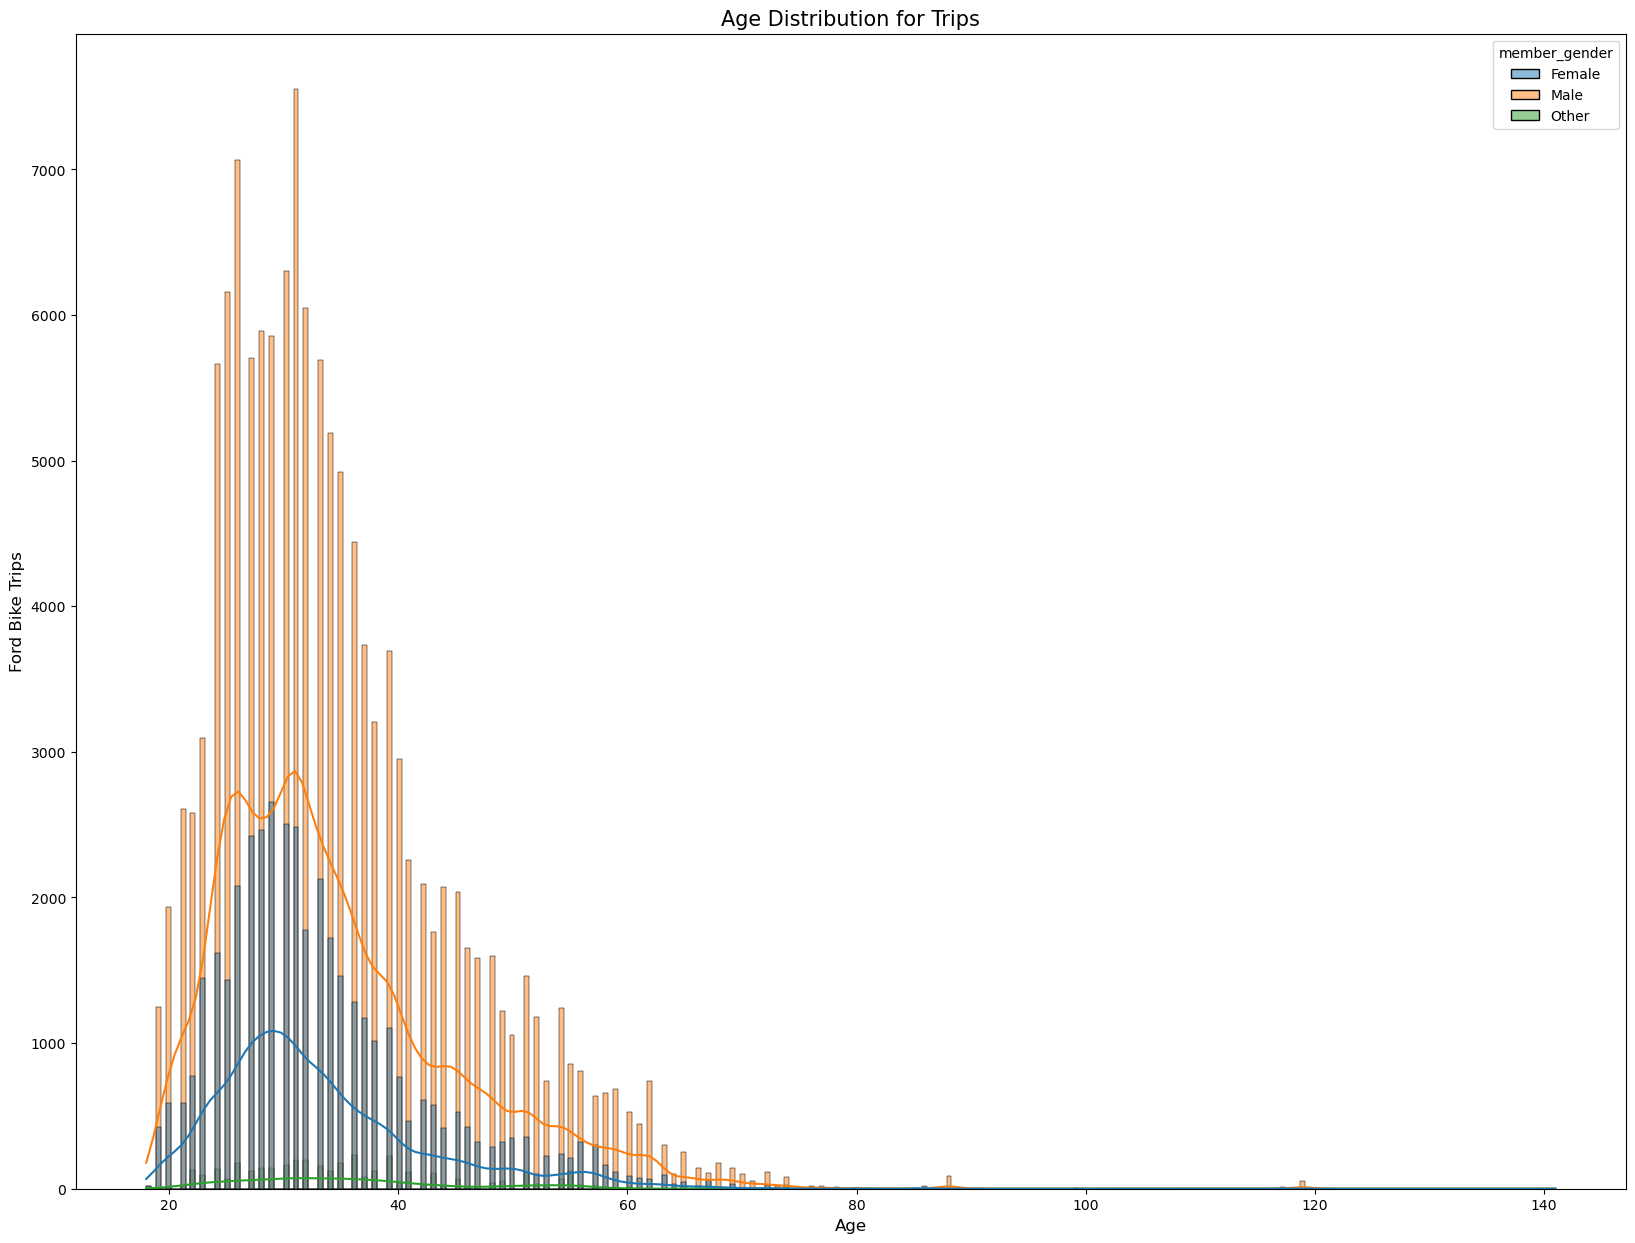

In [20]:
plt.figure(figsize = [20,15])
sns.histplot(data = ford_bike, x = 'age', hue ='member_gender', kde = True)
plt.title('Age Distribution for Trips', fontsize = 15)
plt.ylabel('Ford Bike Trips', fontsize = 12)
plt.xlabel('Age', fontsize = 12); 

## Distribution of User type in relation to duration in hours

> The area of density (number) of subscribers is greater than that of customers but the average customer spend more time on the go bike. 

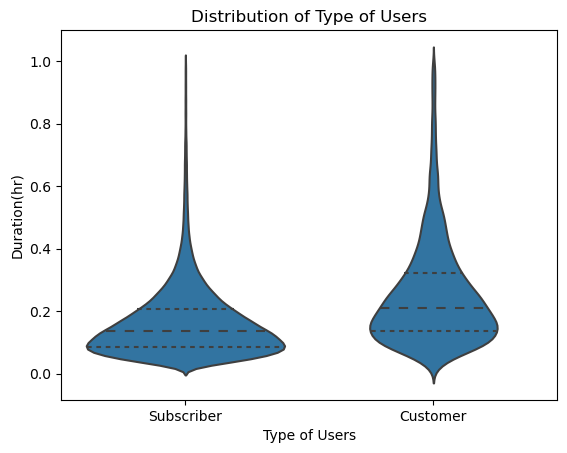

In [21]:
# the duration covered by customers and subscribers is not clear on the violin plot above due to the outliers. 
# reduce the duration sample size to 1 hour to get a clearer view of the distribution of user type with respect to duration

duration_lim = ford_bike[ford_bike['duration_hour'] < 1]

sns.violinplot(data = duration_lim, x='user_type', y ='duration_hour', inner = 'quartile', color = ford_color);
plt.title('Distribution of Type of Users');
plt.xlabel('Type of Users');
plt.ylabel('Duration(hr)');